# Let's get started! ⚡

## Import Module

### Basic Module

In [113]:
# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
# import ydata_profiling

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Visualization

In [114]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette('Set2')

### Data Preprocessing

In [115]:
# Data Preprocessing
import re
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Models

In [116]:
# XGBoost Training
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

### Hyperparameter tuning

In [117]:
# Hyperparameter tuning
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK

# Data Reading

In [118]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [119]:
# 헤드 확인
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [121]:
# 컬럼별 타입과 Null값 확인
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

# Exploratory Data Analysis 📊🤔

## 데이터 정리

In [122]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

In [123]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

### 기본 정보 확인

In [124]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### 결측치 채우기 위한 분석

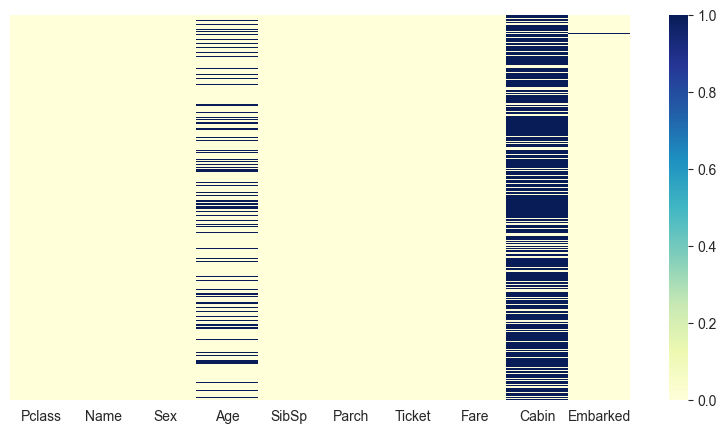

In [126]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
palette=sns.color_palette("pastel")
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [127]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [128]:
data[data.Embarked.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [129]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

Embarked
S    177
C    141
Q      3
Name: count, dtype: int64

<Axes: xlabel='Sex'>

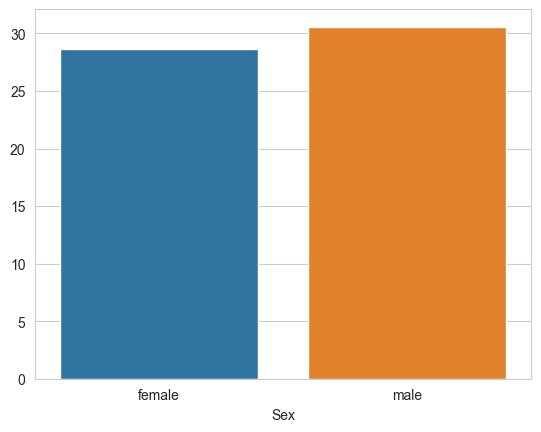

In [130]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [131]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

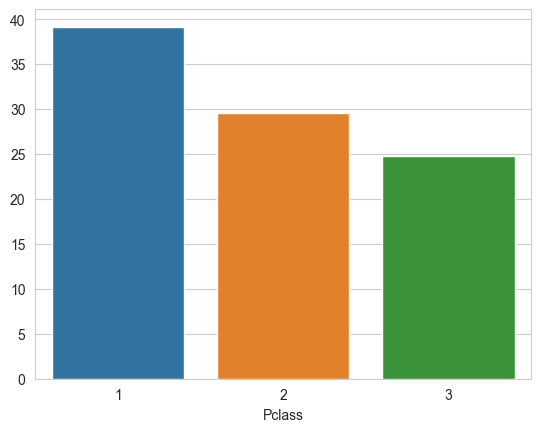

In [132]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [133]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [134]:
data[data.Fare.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


<Axes: xlabel='Fare', ylabel='Count'>

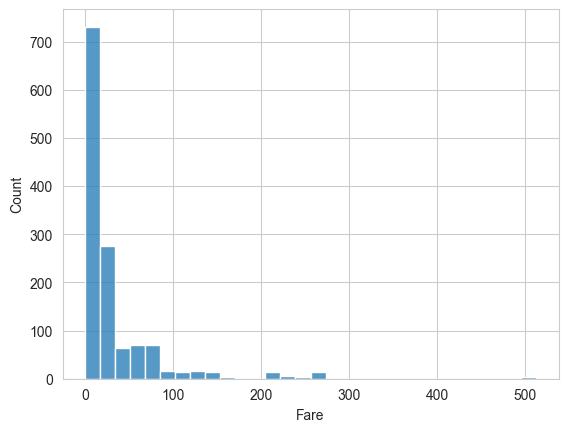

In [135]:
sns.histplot(data.Fare,bins=30)

In [136]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

### 학습데이터만 떼어서 분석

In [137]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

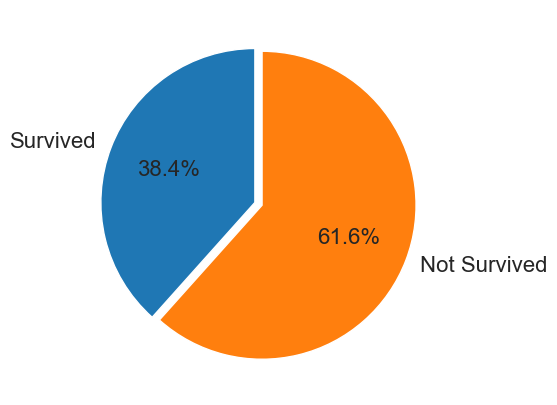

In [138]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [139]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [140]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [141]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

,mean,min,max
Survived,,,
0,22.117887,0.0,263.0000
1,48.395408,0.0,512.3292


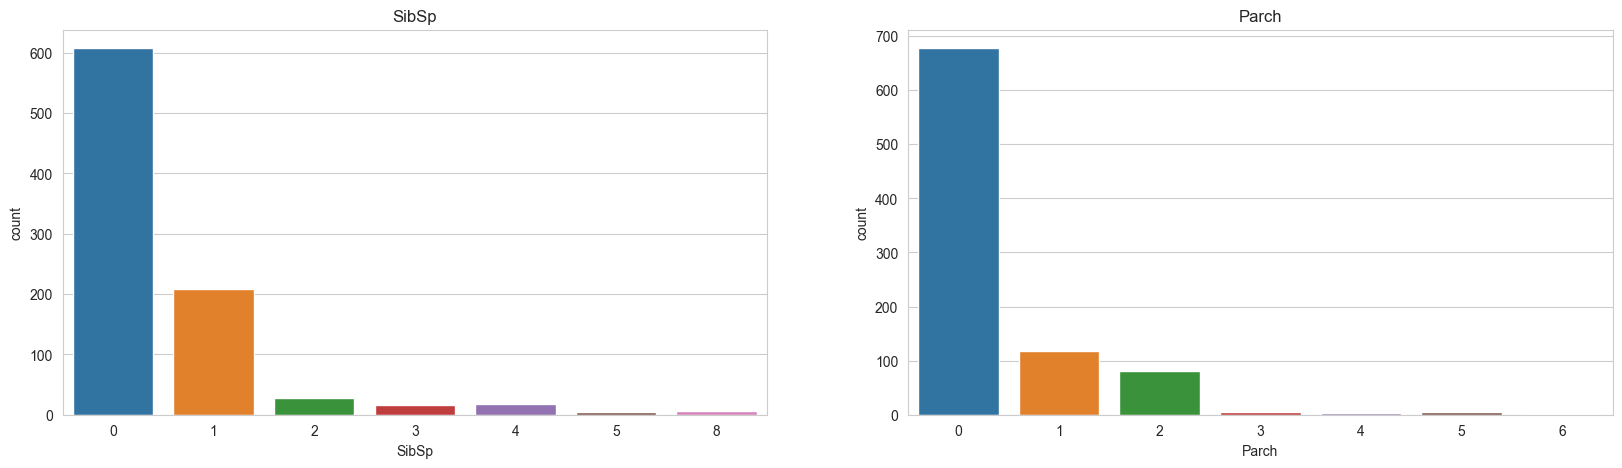

In [142]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0])
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [143]:
data_exp.groupby('Ticket')['Survived'].value_counts().to_frame()

count
Ticket      Survived       
110152      1             3
110413      1             2
            0             1
110465      0             2
110564      1             1
...                     ...
W./C. 6609  0             1
W.E.P. 5734 0             1
W/C 14208   0             1
WE/P 5735   0             1
            1             1

[730 rows x 1 columns]

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

### 학습데이터와 테스트데이터 합치기

In [144]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    df = pd.concat([df_train, df_test], axis=0, sort=False).reset_index(drop=True)
    df ['PassengerId'] = df['PassengerId'].astype(int)

    return df

### 잘못된 승객정보 정정
---
 * Thanks to @Nadezda Demidova : https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn
---

In [145]:
# 잘못된 승객정보 정정
def correct_wrong_passenger_info(df=None):
    df.loc[df['PassengerId'] == 631, 'Age'] = 48

    # Passengers with wrong number of siblings and parch
    df.loc[df['PassengerId'] == 69, ['SibSp', 'Parch']] = [0,0]
    df.loc[df['PassengerId'] == 1106, ['SibSp', 'Parch']] = [0,0]

    return df

### 'Title' 컬럼 생성

In [146]:
# 'Name' 컬럼에서 'Title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'Title' 생성하는 함수
def get_Title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if title in top4_titles:
        return title
    elif title in female_titles_to_Mrs:
        return 'Mrs'
    elif title in female_titles_to_Miss:
        return 'Miss'
    elif title in male_titles_to_Mr:
        return 'Mr'
    else:
        return title

In [147]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['Title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['Title'].isin(title_on_both_side))

    # 치환
    df.loc[cond_mr, 'Title'] = 'Mr'
    df.loc[cond_mrs, 'Title'] = 'Mrs'

    return df

In [148]:
# 'Title'(호칭) 생성
def make_Title(df=None):
    df['Title'] = df['Name'].map(get_Title)

    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_title_on_both_side(df)

    return df

### 단일 피쳐 생성

In [149]:
# 'Surname'(성씨) 생성
def make_Surname(df=None):
    df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
    return df

In [150]:
# 'Family' 생성
def make_Family(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int)
    return df

## 1차 전처리 함수 모음

In [151]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)

    # 잘못된 승객정보 정정
    df = correct_wrong_passenger_info(df)

    # 호칭 만들기
    df = make_Title(df)

    # 'Surname'(성씨) 생성
    df = make_Surname(df)

    # 'Family' 생성
    df = make_Family(df)

    return df

In [152]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

### 'Age' 결측치 채우기 위한 확인

In [153]:
df.groupby('Title')['Age'].agg({'mean', 'median'})

,median,mean
Title,,
Master,4.0,5.482642
Miss,22.0,21.824366
Mr,30.0,32.731405
Mrs,36.0,37.040000


### 'Fare' 결측치 채우기 위한 확인

In [154]:
df.groupby('Pclass')['Fare'].agg({'mean', 'median', 'max'})

,max,median,mean
Pclass,,,
1,512.3292,60.0000,87.508992
2,73.5000,15.0458,21.179196
3,69.5500,8.0500,13.302889


### 'Embarked' 결측치 채우기 위한 확인

In [155]:
df.loc[df['Embarked'].isnull()][['Name', 'Pclass', 'Sex', 'Title']]

,Name,Pclass,Sex,Title
61,"Icard, Miss. Amelie",1,female,Miss
829,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,Mrs


In [156]:
df.groupby('Pclass')['Embarked'].value_counts().to_frame()

count
Pclass Embarked       
1      S           177
       C           141
       Q             3
2      S           242
       C            28
       Q             7
3      S           495
       Q           113
       C           101

## 2차 전처리 함수 선언

### 결측치 채우기

In [157]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
    df['Age'] = df['Age'].astype('int64')
    return df

In [158]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
    return df

In [159]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df=None):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    return df

In [160]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 'Family_Survival' 컬럼 생성
---
* Thanks to @S.XU : https://www.kaggle.com/code/shunjiangxu/blood-is-thicker-than-water-friendship-forever/notebook
---

In [161]:
# 'Family_Survival' 컬럼 생성
def make_Family_Survival(df=None):
    def_survive_val = 0.5
    df['Family_Survival'] = def_survive_val
    survive_df = df[['Survived', 'Name', 'Surname'
                     , 'Fare', 'Ticket', 'PassengerId'
                     , 'SibSp', 'Parch', 'Age', 'Cabin']]

    for grp, grp_df in survive_df.groupby(['Surname', 'Fare']):
        if (len(grp_df) != 1):
            # 가족 그룹(같은 성씨, Fare 2명 이상)을 찾았다.
            for idx, row in grp_df.iterrows():
                max_sur = grp_df.drop(idx)['Survived'].max()
                min_sur = grp_df.drop(idx)['Survived'].min()
                passID = row['PassengerId']
                # 다른 가족의 생존 여부를 이 컬럼에 기록함
                if (max_sur == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (min_sur == 0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

    for _, grp_df in df.groupby('Ticket'):
        if (len(grp_df) != 1):
            # 같은 티켓번호를 가진 다른 사람을 찾았다.
            for idx, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                    max_sur = grp_df.drop(idx)['Survived'].max()
                    min_sur = grp_df.drop(idx)['Survived'].min()
                    passID = row['PassengerId']
                    # 같은 티켓번호를 가진 다른 사람의 생존 여부를 이 컬럼에 기록함
                    if (max_sur == 1.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                    elif (min_sur == 0.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

    return df

### 추가 피쳐 생성 및 매핑

In [162]:
# 카테고리화 피쳐 생성
def make_categorical_columns(df=None):
    # 'Age_Cat' 생성
    df['Age_Cat'] = pd.qcut(df['Age'], 4)
    # 'Fare_Cat' 생성
    df['Fare_Cat'] = pd.qcut(df['Fare'], 5)
    return df

### 레이블 인코딩

In [163]:
# 레이블 인코딩
def label_encoder(df=None):
    encoder = LabelEncoder()
    columns = ['Sex', 'Embarked', 'Title', 'Fare_Cat', 'Age_Cat']
    for column in columns:
        df[column] = encoder.fit_transform(df[column])

    return df

### 컬럼명을 강제로 str로 형변환

In [164]:
# 컬럼명을 강제로 str로 형변환
# 알고리즘에 따라 이 작업이 필요합니다.
def columns_index_to_str_type(df=None):
    df.columns = df.columns.astype(str)
    return df

### 필요없는 컬럼들 드랍

In [165]:
# 필요없는 컬럽들 드랍
def drop_columns(df=None):
    columns = ['Title', 'Fare', 'Age', 'Name'
               , 'PassengerId', 'SibSp', 'Parch'
               , 'Ticket', 'Cabin', 'Embarked', 'Surname']
    df.drop(columns=columns, inplace=True)

    return df

## 2차 전처리 함수 모음

In [166]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)

    # 'Family_Survival' 컬럼 생성
    df = make_Family_Survival(df)

    # 카테고리화 컬럼 생성
    df = make_categorical_columns(df)

    # 레이블 인코딩
    df = label_encoder(df)

    # 컬럼명을 강제로 str로 형변환
    df = columns_index_to_str_type(df)

    # 필요없는 컬럼들 드랍
    df = drop_columns(df)

    return df

In [167]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 전처리 결과 확인

### 결측치, Unique value, dtype 확인

In [168]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value, %'] = round(df.isnull().sum()/df.shape[0]*100)
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b

basic_details(df)

,"Missing value, %",N unique value,dtype
Survived,32.0,2,float64
Pclass,0.0,3,int64
Sex,0.0,2,int32
Family,0.0,9,int32
Family_Survival,0.0,3,float64
Age_Cat,0.0,4,int32
Fare_Cat,0.0,5,int32


In [169]:
df.head(3)

,Survived,Pclass,Sex,Family,Family_Survival,Age_Cat,Fare_Cat
0,0.0,3,1,1,0.5,0,0
1,1.0,1,0,1,0.5,3,4
2,1.0,3,0,0,0.5,1,1


### 피어슨 계수 행렬 시각화

In [170]:
# 피어슨 계수 행렬 시각화
def plot_Perason_heatmap(df=None):
    corr_matrix = pd.get_dummies(df).corr(method='pearson')

    plt.figure(figsize=(10, 10))
    sns.heatmap(
        corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
    )
    plt.title("Pearson Correlation Heatmap")
    plt.show()
    return

# plot_Perason_heatmap(df)

# XGBoost Training 🏋️‍♂️

## 학습데이터와 테스트데이터 분리

In [171]:
# 학습데이터와 테스트데이터 분리
train_set = df.iloc[:df_train.shape[0],]
test_set = df.iloc[df_train.shape[0]:,]

# 학습데이터의 데이터와 답 분리
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']

# 테스트데이터 생성
X_test = test_set.drop(['Survived'], axis=1)

## Scaling

In [172]:
# StandardScaling
def standard_scaling(X_train=None, X_test=None):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

X_train, X_test = standard_scaling(X_train, X_test)

## Hyperopt

In [173]:
# 학습데이터와 검증데이터 분리
X_tr, X_val, y_tr, y_val = train_test_split(
      X_train
    , y_train
    , test_size=0.2
    , random_state=42
)

In [174]:
# 1 step : search space 설정, XGBosst 하이퍼파라미터들의 범위 지정
xgb_search_space = {
      'max_depth' : hp.quniform('max_depth', 3, 20, 1) # return float
    , 'min_child_weight' : hp.quniform('min_child_weight', 1, 12, 1)
    , 'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
    , 'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)
}

In [175]:
# 2 step : objective function => return acccuracy, auc
def objective_func(search_space):
    xgb_clf = XGBClassifier(
          n_estimators=300
        , objective='binary:logistic'
        , max_depth=int(search_space['max_depth'])
        , min_child_weight=int(search_space['min_child_weight'])
        , learning_rate=search_space['learning_rate']
        , colsample_bytree=search_space['colsample_bytree']
        , eval_metric='logloss'
    )
    accuracy = cross_val_score(
          xgb_clf
        , X_train
        , y_train
        , scoring='accuracy'
        , cv=5
    )
    return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

In [176]:
# 3 STEP : fmin => best
trial_val = Trials() # 결과 저장하는 객체
best = fmin(
      fn=objective_func
    , space=xgb_search_space
    , algo=tpe.suggest
    , max_evals=50
    , trials=trial_val # 중간 결과 저장
    , rstate=np.random.default_rng(seed=42)
)

100%|██████████| 50/50 [00:28<00:00,  1.76trial/s, best loss: -0.8540769568765301]


In [177]:
print(f'best : {best}')
print(f'best score : {-1*trial_val.best_trial["result"]["loss"]:.4f}')

best : {'colsample_bytree': 0.8999139193825538, 'learning_rate': 0.024567357801077952, 'max_depth': 7.0, 'min_child_weight': 8.0}
best score : 0.8541


In [178]:
# 4 STEP : BEST MODEL
xgb_clf = XGBClassifier(
      n_estimatior=300
    , objective='binary:logistic'
    , learning_rate=np.round(best['learning_rate'],5)
    , max_depth=int(best['max_depth'])
    , min_child_weight=int(best['min_child_weight'])
    , colsample_bytree=np.round(best['colsample_bytree'],5)
)

## Fit & Prediction

In [179]:
# 위에서 찾은 최적의 hyperparameters set을 이용한 최고의 모델 생성
# 조기 종료 처리 => 검증데이터 필요
evals = [(X_tr,y_tr),(X_val,y_val)]
# 학습 진행
xgb_clf.fit(
      X_tr
    , y_tr
    , early_stopping_rounds=100
    , eval_metric='logloss'
    , eval_set=evals
    , verbose=True
)

[0]	validation_0-logloss:0.65121	validation_1-logloss:0.66830
[1]	validation_0-logloss:0.64072	validation_1-logloss:0.65667
[2]	validation_0-logloss:0.63077	validation_1-logloss:0.64563
[3]	validation_0-logloss:0.62131	validation_1-logloss:0.63522
[4]	validation_0-logloss:0.61232	validation_1-logloss:0.62524
[5]	validation_0-logloss:0.60375	validation_1-logloss:0.61582
[6]	validation_0-logloss:0.59642	validation_1-logloss:0.60801
[7]	validation_0-logloss:0.58859	validation_1-logloss:0.59931
[8]	validation_0-logloss:0.58189	validation_1-logloss:0.59219
[9]	validation_0-logloss:0.57543	validation_1-logloss:0.58481
[10]	validation_0-logloss:0.56908	validation_1-logloss:0.57785
[11]	validation_0-logloss:0.56245	validation_1-logloss:0.57044
[12]	validation_0-logloss:0.55677	validation_1-logloss:0.56438
[13]	validation_0-logloss:0.55116	validation_1-logloss:0.55821
[14]	validation_0-logloss:0.54528	validation_1-logloss:0.55163
[15]	validation_0-logloss:0.53965	validation_1-logloss:0.54531
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.89991, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02457, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimatior=300, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [180]:
# 테스트데이터 넣어서 예측
pred = xgb_clf.predict(X_test)

## Plot feature importance

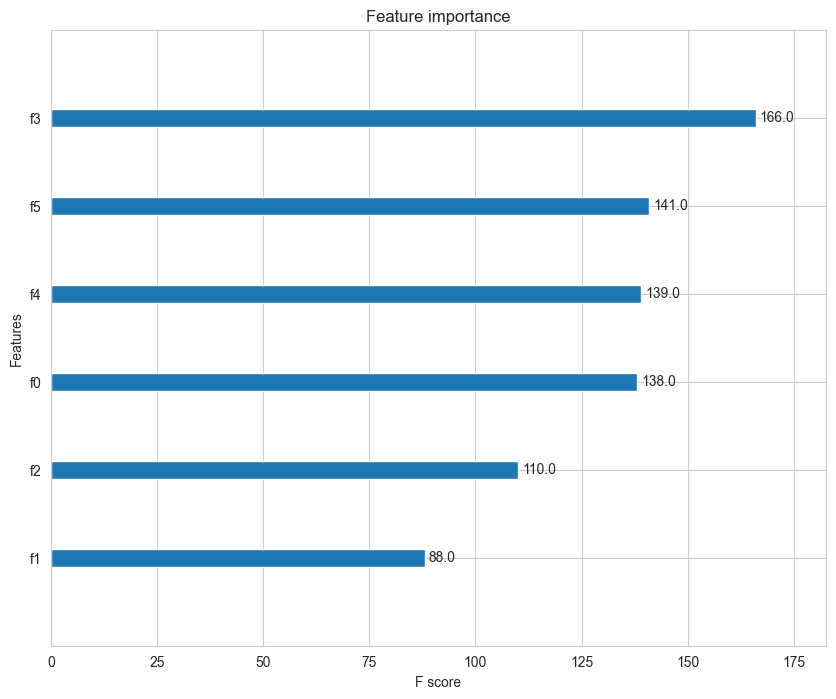

In [181]:
# 피처 중요도 시각화
from xgboost import plot_importance
def plot_feature_importance(xgb_clf=None):
    fig, ax = plt.subplots(figsize=(10,8))
    plot_importance(xgb_clf, ax=ax)
    plt.show()
    return

# plot_feature_importance(xgb_clf)

# Submission File 🏆🎯

## 제출파일 생성

In [182]:
def make_submission_file(df_test=None, pred=None):
    # 제출파일 준비: PassengerId - Survived
    submission = pd.DataFrame({
        'PassengerId' : df_test['PassengerId'],
        'Survived' : pred
    })

    submission['Survived'] = submission['Survived'].astype(int)

    # 제출파일 저장
    submission.to_csv('submission.csv', index=False)
    print('your submission file is saved!')
    return

make_submission_file(df_test, pred)

your submission file is saved!


## 채점하기

In [183]:
def grade_submission(filename=None):
    # 생성된 데이터 파일과 솔루션 불러오기
    # 파일 경로 적절히 수정해서 쓰세요.
    filename = './' + filename
    submission = pd.read_csv(filename)
    solution = pd.read_csv('./solution.csv')

    # 채점 테이블 생성
    marking = submission.merge(solution, on='PassengerId')
    marking.columns = ['PassengerId', 'Submission', 'Solution']

    # 'Check' : 맞으면 1, 틀리면 0
    marking['Check'] = 0

    # 채점
    cond = marking['Submission'] == marking['Solution']
    marking.loc[cond, 'Check'] = 1

    # 정답 계산 및 출력
    result = marking['Check'].sum() / marking.shape[0]
    print('정답: {0:.5f}'.format(result))

    return

grade_submission('submission.csv')

정답: 0.80144
